In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import base64
from multiprocessing.managers import BaseManager
import io
from matplotlib import animation

In [5]:
warnings.filterwarnings("ignore")

In [6]:
terror_data = pd.read_excel(r"C:\Users\ofaru\Desktop\GitHub\World_Terrorism_Analysis\gtd_data.xlsx")

<h1>Exploratory Data Analysis</h1>

In [7]:
terror_data.head()

,Day,Month,Year,Date,Country,City,Latitude,Longitude,Attacker,Death,Attack Type,Target Type,Weapon Type,Weapon Sub Type,Weapon Detail
0,2.0,7.0,1970.0,2/7/1970,Dominican Republic,Santo Domingo,18456792,-69951164,MANO-D,1.0,Assassination,Private Citizens & Property,Unknown,NaN,NaN
1,1.0,1.0,1970.0,1/1/1970,United States,Cairo,19371887,-99086624,Black Nationalists,0.0,Armed Assault,Police,Firearms,Unknown Gun Type,Several gunshots were fired.
2,2.0,1.0,1970.0,2/1/1970,Uruguay,Montevideo,15478598,120599741,Tupamaros (Uruguay),0.0,Assassination,Police,Firearms,Automatic or Semi-Automatic Rifle,Automatic firearm
3,2.0,1.0,1970.0,2/1/1970,United States,Oakland,3799749,23762728,Unknown,0.0,Bombing/Explosion,Utilities,Explosives,Unknown Explosive Type,NaN
4,2.0,1.0,1970.0,2/1/1970,United States,Madison,33580412,130396361,New Year's Gang,0.0,Facility/Infrastructure Attack,Military,Incendiary,Molotov Cocktail/Petrol Bomb,Firebomb consisting of gasoline


In [8]:
terror_data.shape

(181690, 15)

In [9]:
terror_data.describe()

,Day,Month,Year,Death
count,181686.000000,181686.000000,181686.000000,135539.000000
mean,15.505955,6.467389,2002.639675,2.185806
std,8.813856,3.388238,13.258717,10.723854
min,0.000000,0.000000,1970.000000,0.000000
25%,8.000000,4.000000,1991.000000,0.000000
50%,15.000000,6.000000,2009.000000,0.000000
75%,23.000000,9.000000,2014.000000,2.000000
max,31.000000,12.000000,2017.000000,1570.000000


In [10]:
terror_data.isnull().sum()

Day                    4
Month                  4
Year                   4
Date                   4
Country                4
City                 438
Latitude            4556
Longitude           4557
Attacker           30341
Death              46151
Attack Type        30120
Target Type        30120
Weapon Type        35238
Weapon Sub Type    51383
Weapon Detail      81395
dtype: int64

<h2>Basic Analysis</h2>

In [11]:
print("Known Count of Deaths in Terrorist Attacks:", terror_data["Death"].value_counts()[0], "\n")

print("Country With The Highest Terrorist Attacks:", terror_data["Country"].value_counts().index[0], "\n")

print("Most deaths in an attack:\n",terror_data.loc[terror_data['Death'].idxmax()], "\n")

Known Count of Deaths in Terrorist Attacks: 70891 

Country With The Highest Terrorist Attacks: Iraq 

Most deaths in an attack:
 Day                                                       12.0
Month                                                      6.0
Year                                                    2014.0
Date                                                 12/6/2014
Country                                                   Iraq
City                                                    Tikrit
Latitude                                              33303566
Longitude                                             44371773
Attacker           Islamic State of Iraq and the Levant (ISIL)
Death                                                   1570.0
Attack Type                        Hostage Taking (Kidnapping)
Target Type                                           Military
Weapon Type                                           Firearms
Weapon Sub Type                               Unkno

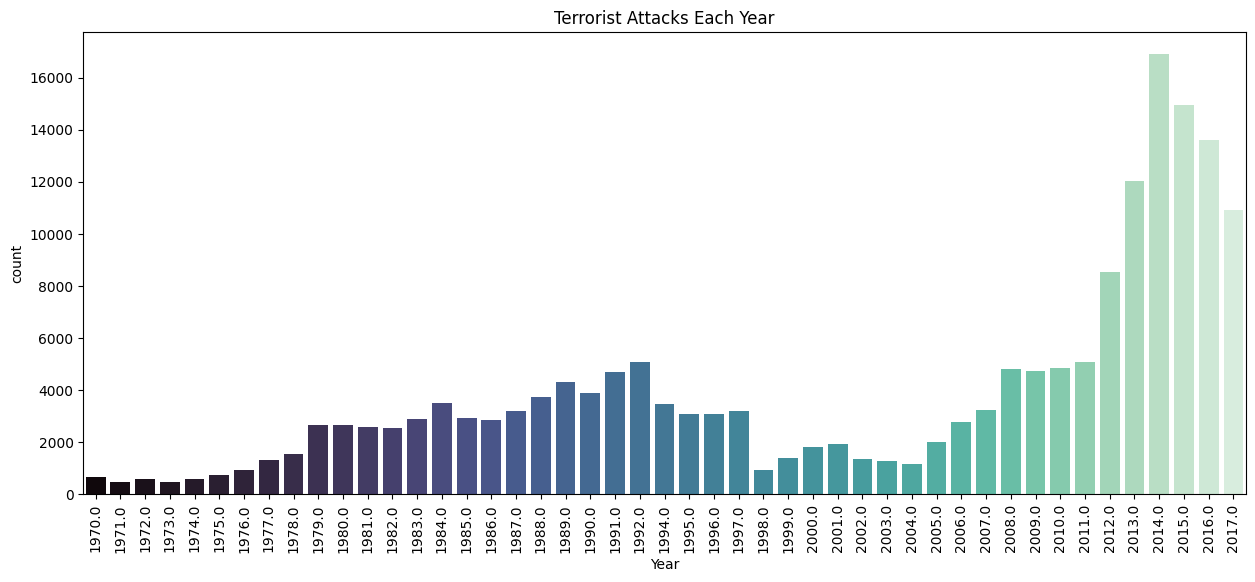

In [12]:
plt.subplots(figsize=(15,6))
sns.countplot(data=terror_data, x="Year", palette="mako")
plt.xticks(rotation=90)
plt.title('Terrorist Attacks Each Year')
plt.show()

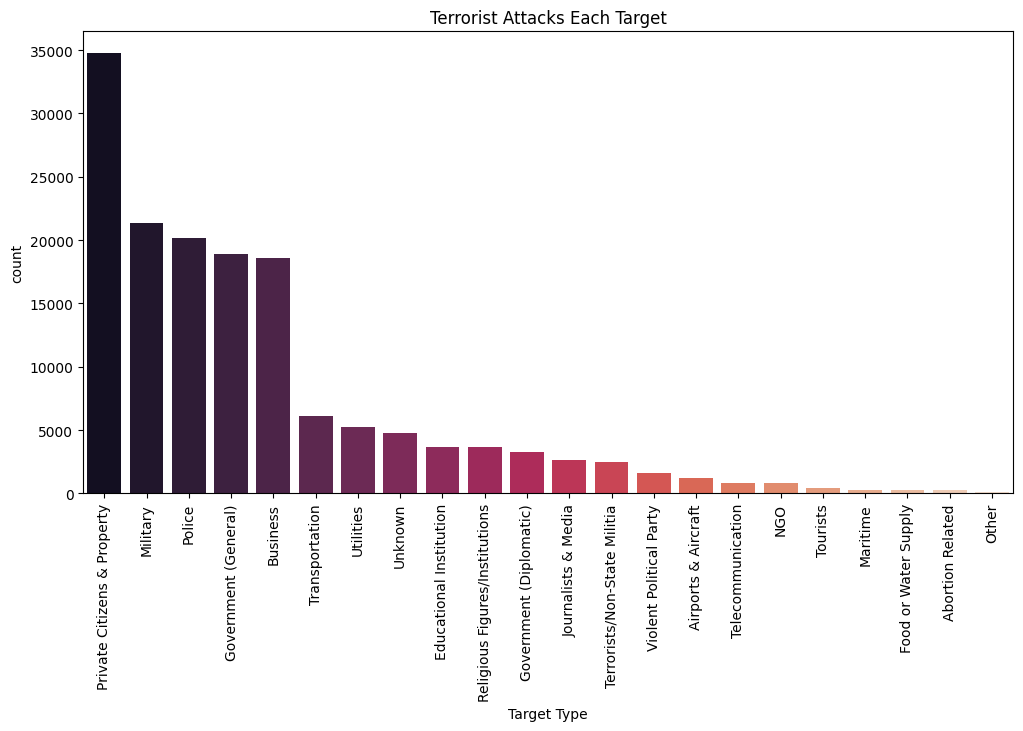

In [13]:
plt.subplots(figsize=(12,6))
sns.countplot(data=terror_data, x="Target Type", order=terror_data["Target Type"].value_counts().index, palette="rocket")
plt.xticks(rotation=90)
plt.title('Terrorist Attacks Each Target')
plt.show()

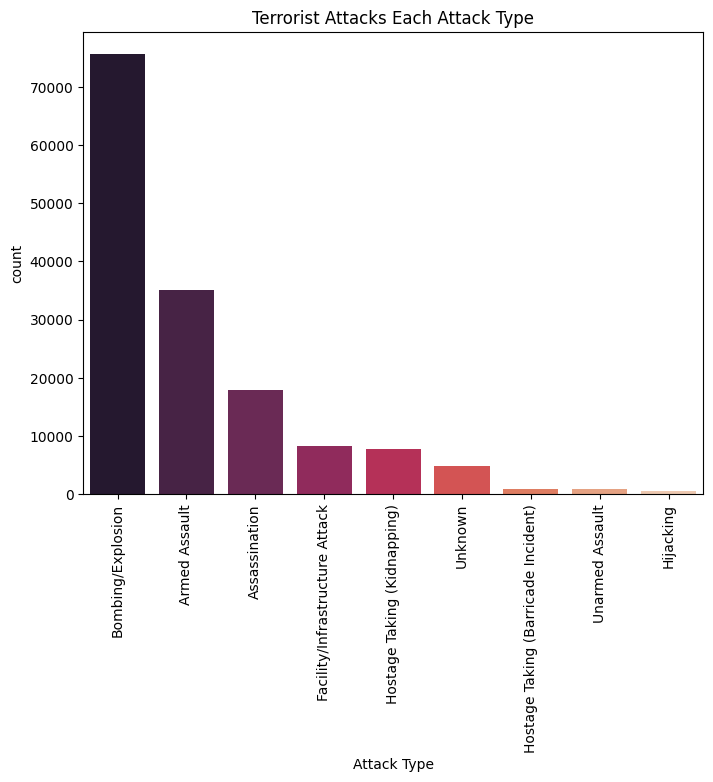

In [14]:
plt.subplots(figsize=(8,6))
sns.countplot(data=terror_data, x="Attack Type", order=terror_data["Attack Type"].value_counts().index, palette="rocket")
plt.xticks(rotation=90)
plt.title('Terrorist Attacks Each Attack Type')
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


IndexError: list index out of range

Error in callback <function _draw_all_if_interactive at 0x00000136FFF45D00> (for post_execute):


TypeError: BaseManager.__init__() got an unexpected keyword argument 'projection'

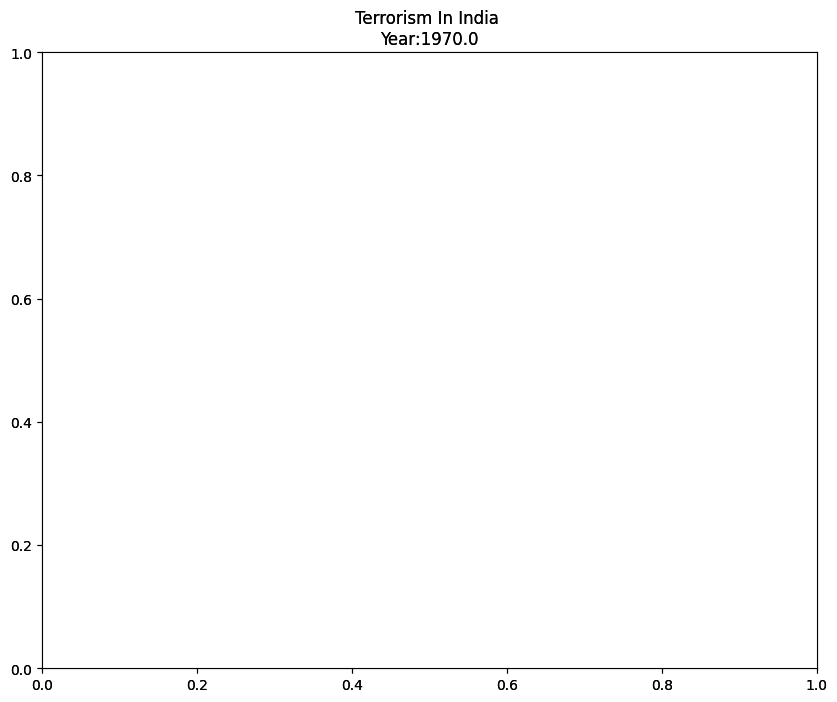

In [15]:
terror_turkey=terror_data[terror_data['Country']=='Turkey']

fig = plt.figure(figsize = (10,8))
def animate(Year):
    ax = plt.axes()
    ax.clear()
    ax.set_title('Terrorism In India '+'\n'+'Year:' +str(Year))
    m5 = BaseManager(projection='lcc',resolution='l',llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=37,lat_0=28,lon_0=77)
    lat_gif=list(terror_turkey[terror_turkey['Year']==Year].Latitude)
    long_gif=list(terror_turkey[terror_turkey['Year']==Year].Longitude)
    x_gif,y_gif=m5(long_gif,lat_gif)
    m5.scatter(x_gif, y_gif,s=[Death for Death in zip(terror_turkey[terror_turkey['Year']==Year].Death,terror_turkey[terror_turkey['Year']==Year])],color = 'r')
    m5.drawcoastlines()
    m5.drawcountries()
    m5.fillcontinents(color='coral',lake_color='aqua', zorder = 1,alpha=0.4)
    m5.drawmapboundary(fill_color='aqua')
ani = animation.FuncAnimation(fig,animate,list(terror_turkey.Year.unique()), interval = 1500)    
ani.save('animation.gif', writer='imagemagick', fps=1)
plt.close(1)
filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))